In [1]:
from PIL import Image
import cv2
import numpy as np
import requests



In [2]:
image=Image.open(r"/content/car_traffic.jpeg")

In [5]:
image=image.resize((450,250))

In [7]:
image_arr=np.array(image)

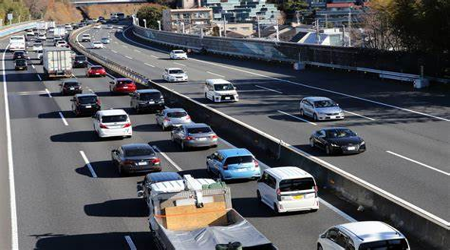

In [8]:
image

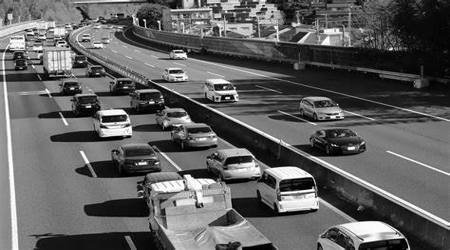

In [9]:
grey=cv2.cvtColor(image_arr,cv2.COLOR_BGR2GRAY)
Image.fromarray(grey)

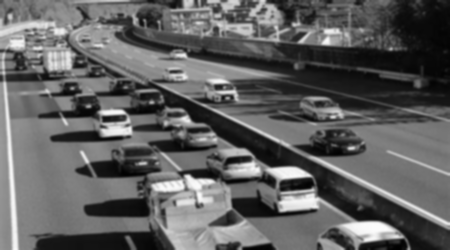

In [10]:
blur = cv2.GaussianBlur(grey,(5,5),0)
Image.fromarray(blur)

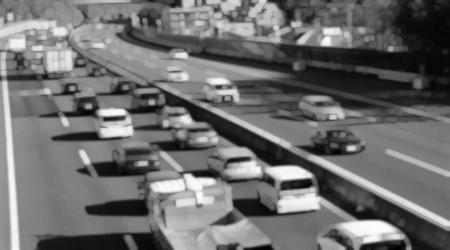

In [11]:
dilated = cv2.dilate(blur,np.ones((3,3)))
Image.fromarray(dilated)

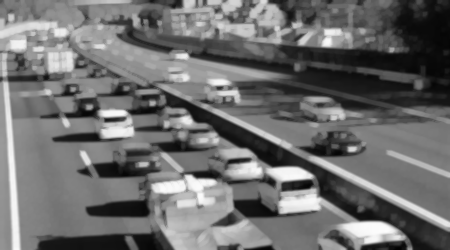

In [12]:
kernel =cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
closing = cv2.morphologyEx(dilated,cv2.MORPH_CLOSE,kernel)
Image.fromarray(closing)

In [14]:
car_cascade_src ='cars.xml'
car_cascade=cv2.CascadeClassifier(car_cascade_src)
cars=car_cascade.detectMultiScale(closing,1.1,1)

10 cars found


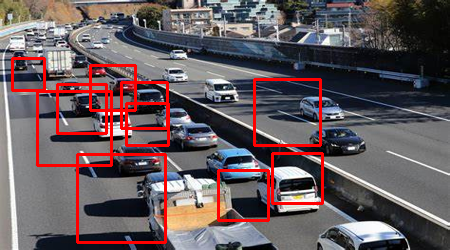

In [23]:
cnt=0
for(x,y,w,h) in cars:
  cv2.rectangle(image_arr,(x,y),(x+w,y+h),(255,0,0),2)
  cnt+=1
print(cnt, "cars found")
Image.fromarray(image_arr)

# New Section